<a href="https://colab.research.google.com/github/vicenzo28/archive/blob/main/Klasifikasi_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 1].values

In [18]:
y

array(['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female',


In [20]:
print(X)

[[ 19  15]
 [ 21  15]
 [ 20  16]
 [ 23  16]
 [ 31  17]
 [ 22  17]
 [ 35  18]
 [ 23  18]
 [ 64  19]
 [ 30  19]
 [ 67  19]
 [ 35  19]
 [ 58  20]
 [ 24  20]
 [ 37  20]
 [ 22  20]
 [ 35  21]
 [ 20  21]
 [ 52  23]
 [ 35  23]
 [ 35  24]
 [ 25  24]
 [ 46  25]
 [ 31  25]
 [ 54  28]
 [ 29  28]
 [ 45  28]
 [ 35  28]
 [ 40  29]
 [ 23  29]
 [ 60  30]
 [ 21  30]
 [ 53  33]
 [ 18  33]
 [ 49  33]
 [ 21  33]
 [ 42  34]
 [ 30  34]
 [ 36  37]
 [ 20  37]
 [ 65  38]
 [ 24  38]
 [ 48  39]
 [ 31  39]
 [ 49  39]
 [ 24  39]
 [ 50  40]
 [ 27  40]
 [ 29  40]
 [ 31  40]
 [ 49  42]
 [ 33  42]
 [ 31  43]
 [ 59  43]
 [ 50  43]
 [ 47  43]
 [ 51  44]
 [ 69  44]
 [ 27  46]
 [ 53  46]
 [ 70  46]
 [ 19  46]
 [ 67  47]
 [ 54  47]
 [ 63  48]
 [ 18  48]
 [ 43  48]
 [ 68  48]
 [ 19  48]
 [ 32  48]
 [ 70  49]
 [ 47  49]
 [ 60  50]
 [ 60  50]
 [ 59  54]
 [ 26  54]
 [ 45  54]
 [ 40  54]
 [ 23  54]
 [ 49  54]
 [ 57  54]
 [ 38  54]
 [ 67  54]
 [ 46  54]
 [ 21  54]
 [ 48  54]
 [ 55  57]
 [ 22  57]
 [ 34  58]
 [ 50  58]
 [ 68  59]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
y_test

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female'],
      dtype=object)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[ 0.59131873, -0.44803883],
       [-1.10084935,  0.34173303],
       [ 0.16827671,  1.43237037],
       [-0.81882133, -0.03434881],
       [-0.32527231,  0.6425985 ],
       [ 1.08486776, -1.23781069],
       [ 1.50790978, -1.16259433],
       [ 1.22588177,  0.68020669],
       [ 1.8604448 , -0.86172885],
       [ 0.87334675, -0.63607975],
       [ 0.02726271,  0.37934122],
       [ 0.59131873, -0.03434881],
       [-0.46628632,  1.357154  ],
       [-0.25476531, -1.42585161],
       [-0.0432443 ,  0.6425985 ],
       [ 0.66182574, -0.03434881],
       [ 0.80283975, -0.67368793],
       [-0.53679332,  0.75542305],
       [-0.39577931, -0.71129612],
       [ 1.15537476, -0.14717336],
       [-0.25476531,  0.49216577],
       [ 2.07196581, -0.07195699],
       [-0.46628632,  0.45455758],
       [ 0.73233274,  0.04086756],
       [-0.95983534,  0.60499032],
       [ 0.80283975, -0.10956518],
       [ 1.9309518 ,  0.07847574],
       [-0.1137513 , -1.53867617],
       [-0.25476531,

In [25]:
y_test

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female'],
      dtype=object)

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
y_pred

array(['Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female'], dtype='<U6')

In [29]:
y_test

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female'],
      dtype=object)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[24  2]
 [22  2]]


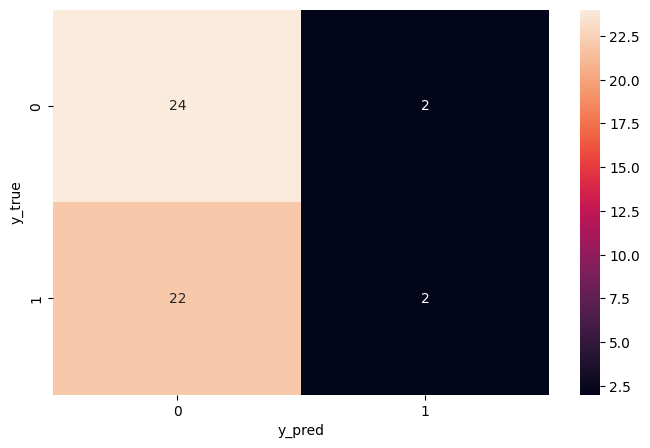

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [32]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.52      0.92      0.67        26
        Male       0.50      0.08      0.14        24

    accuracy                           0.52        50
   macro avg       0.51      0.50      0.40        50
weighted avg       0.51      0.52      0.42        50



TypeError: ignored

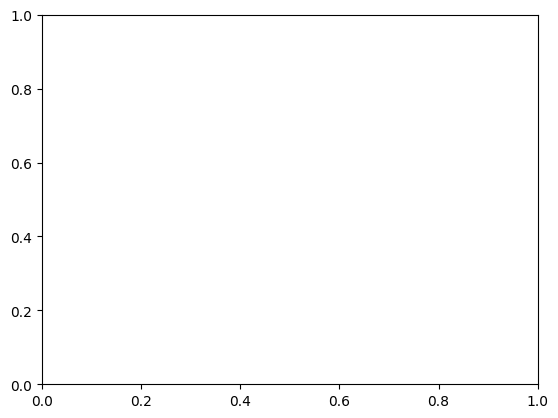

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


TypeError: ignored

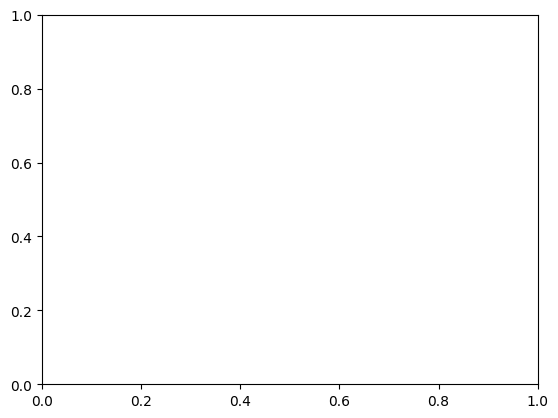

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()